In [1]:
import os
import torch
import torchvision
import matplotlib.pyplot as plt

from models.celeba import *

/home/hjlee/.conda/envs/hydra/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# parameters
model = "wae_mmd" # or "wae_gan"
checkpoint = 0
z_dim = 64

Load generator

In [4]:
Gen = Decoder().cuda()
if checkpoint > 0:
    Gen.load_state_dict(torch.load(f"../outputs/CelebA/{model}/Models/dec_{checkpoint}"))
else:
    Gen.load_state_dict(torch.load(f"../outputs/CelebA/{model}/Models/best_dec"))

Sample Generation

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


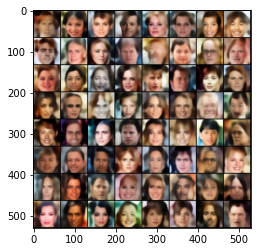

In [6]:
torch.manual_seed(2020)
sz = 64
z_sample = torch.randn(sz, z_dim).cuda()
sample = ((Gen(z_sample)+1)/2.).detach().cpu()
plt.imshow(torchvision.utils.make_grid(sample).permute((1,2,0)))

Generate 10,000 images for computing Inception Score or FID

In [ ]:
os.makedirs(f"../results/CelebA/{model}", exist_ok=True)
for i in range(100):
    z_sample = torch.randn(100, z_dim).cuda()
    samples = (Gen(z_sample)+1)/2.
    for j, sample in enumerate(samples):
        torchvision.utils.save_image(sample, f"../results/CelebA/{model}/image_{i*100+j+1}.png")